<h1 style='color: green; font-size: 30px; font-weight: bold;'>Data Science - Regressão Linear: de baixo dos panos</h1>

# <font color='black' style='font-size: 24px;'>1.1 Conhecendo o Dataset</font>
<hr style='border: 2px solid black;'>

## Importando o numpy, pandas e random

In [1]:
import numpy as np
import pandas as pd
import random
random.seed(42)

## O Dataset e o Projeto
<hr>

### Descrição:
<p style='font-size: 15px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>O mercado imobiliário vem sendo objeto de diversos estudos e pesquisas nos últimos tempos. A crise financeira que afeta a economia tem afetado significativamente os investimentos e ganhos advindos deste setor. Este cenário incentiva o aumento do interesse por estudos de previsão de demanda baseados em características deste mercado, dos imóveis e do entorno destes imóveis.</p>

<p style='font-size: 15px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Neste contexto o objetivo principal do nosso projeto é desenvolver um sistema de avaliação imobiliária utilizando a metodologia de regressões lineares que é uma das técnicas de machine learning.</p>

<p style='font-size: 15px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nosso dataset é uma amostra aleatória de tamanho 5000 de imóveis disponíveis para venda no município do Rio de Janeiro.</p>

### Dados:
<ul style='font-size: 15px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (R$) de oferta do imóvel;</li>
    <li><b>Area</b> - Área do imóvel em m².</li>
</ul>

In [2]:
dados = pd.read_csv('Dados/dados_regressao_simples.csv')

In [3]:
dados.head()

,Valor,Area
0,4600000,280
1,900000,208
2,2550000,170
3,550000,100
4,2200000,164


In [4]:
valor = np.log(dados['Valor'])
area = np.log(dados['Area'])

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

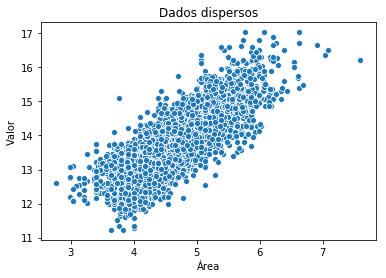

In [6]:
ax = sns.scatterplot(x=area, y=valor)

ax.set_title('Dados dispersos')
ax.set_xlabel('Área')
ax.set_ylabel('Valor')
plt.show()

Podemos então definir uma hipótese a partir das constantes $\alpha$ e $\beta$ tal que:

$$y_i = \theta_1 x_i + \theta_0 + \epsilon_i$$

Sendo $y_i$ é o valor de um determinado imóvel, $x_i$ é a área deste mesmo imóvel e o termo $\epsilon_i$ é o termo de erro (esperamos que pequeno) representando que existem fatores não levados em consideração para este modelo simples.

Supondo que temos $\theta_1$ e $\theta_0$, podemos fazer uma previsão através facilmente.

In [7]:
def prever(theta0, theta1, x_i):
    return theta1*x_i + theta0 

Como vamos escolher as constântes $\theta_0$ e $\theta_1$?

Sabendo que podemos calcular a saída prevista com a função "prever" e sabendo qual é a saída real, é possível calcularmos o erro de cada previsão fazendo a diferença entre a saída real e a saída prevista.

In [8]:
def erro(theta0, theta1, x_i, y_i):
    return y_i - prever(theta0, theta1, x_i)

No entanto esta função de erro calcula apenas o erro de uma saída, e não de todas elas. Ainda que podemos ter uma saída com erro positivo cancelando uma outra saída com erro negativo. Então, devemos somar todos os erros e elevá-los ao quadrado para que todos erros sejam positivos.

$$
EQM = \frac{1}{N}\sum^{N}_{i=0}(y_i - y^p_i)^2
$$

In [9]:
def soma_erro_quadratico_medio(previsto, y):
    return np.array([(y_i - y_previsto) ** 2 for y_previsto, y_i in zip(previsto,y)]).mean()

Agora podemos ver a regressão como um problema de otimização. Devemos minimizar esta função de soma dos erros quadráticos. Isto é um problema conhecido na algebra linear como minímos quadrados e sua resolução dá as equações:

$$\theta_1 = correlacao(x, y) \times \frac{\sigma(y)}{\sigma(x)}$$

$$\theta_0 = \bar{y} - \alpha\bar{x}$$

Sendo $\bar{x}$ e $\bar{y}$ as médias dos valores de x e y, correlação(x, y) é a correlação entre os valores de x e y, e $\sigma(x)$, $\sigma(y)$ os desvios padrões de x e y.

Assim, vamos definir uma função para minimizar os valores de $\theta_1$ e $\theta_0$. 

In [10]:
def minimos_quadrados(x, y):
    theta1 = np.corrcoef(x,y)[0,1] * y.std() / x.std()
    theta0 = y.mean() - theta1 * x.mean()
    return theta1, theta0

Agora sim, podemos escolher valores para $\theta_0$ e $\theta_1$ e fazer nossa regressão!

In [11]:
theta1, theta0 = minimos_quadrados(area, valor)

In [12]:
print(theta1)
print(theta0)

1.273136797389059
7.806465474455767


Para avaliar se nossa regressão está de fato representando o que queremos, vamos verificar na função de erro:

In [13]:
soma_erro_quadratico_medio(prever(theta0, theta1, area), valor)

0.2922746317391325